In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install opencv-python

In [3]:
!pip install cmake

In [4]:
!pip install dlib

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

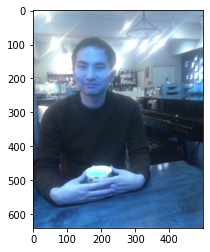

In [6]:
import os
my_image_path = '/content/gdrive/MyDrive/Data/카메라 앱/img.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (500, 640))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

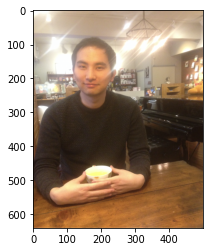

In [7]:
#OpenCV는 BGR(파랑, 녹색, 빨강)을 사용,matplotlib, dlib 등의 이미지 라이브러리는 모두 이미지 채널을 RGB(빨강, 녹색, 파랑) 순으로 사용 - 색 전환
# plt.imshow 이전에 RGB 이미지로 전환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [8]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [9]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(115, 140) (223, 247)]]


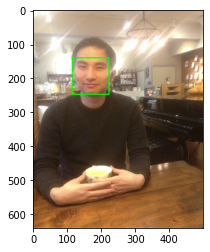

In [10]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

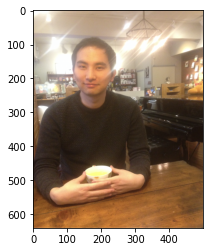

In [11]:
#OpenCV는 BGR(파랑, 녹색, 빨강)을 사용,matplotlib, dlib 등의 이미지 라이브러리는 모두 이미지 채널을 RGB(빨강, 녹색, 파랑) 순으로 사용 - 색 전환
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

`dlib detector` 는 `dlib.rectangles `타입의 객체를 반환합니다.

`dlib.rectangles `는 `dlib.rectangle` 객체의 배열 형태로 이루어져 있습니다.

`dlib.rectangle`객체는 `left()`, `top()`, `right()`, `bottom()`,` height()`, `width() `등의 멤버 함수를 포함하고 있습니다. 더 자세한 정보는 dlib docs를 참고

Classes - [dlib documentation](http://dlib.net/python/index.html#dlib.rectangles)

(편집자 주) 혹시 아래 그림처럼 얼굴영역을 나타내는 녹색박스가 정상적으로 출력되지 않는 경우가 있을 수 있습니다. 그런 경우라면 우선은 저자의 사진을 활용하여 dlib을통한 face detection이 정상적으로 진행되고 있는지를 체크해 본 후 진행하는 것이 좋겠습니다.

In [12]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2021-10-03 08:22:09--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_  20%[===>                ]  12.62M  1003KB/s    in 65s     

2021-10-03 08:23:14 (200 KB/s) - Connection closed at byte 13235847. Retrying.

--2021-10-03 08:23:15--  (try: 2)  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 64040097 (61M), 50804250 (48M) remaining
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[++++===============>]  61.07M  27.5MB/s    in 1.8s    

2021-10-03 08:23:17 (27.5 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/640400



```
$ wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
$ mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
$ cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2
```

- 가상 쥬피터 노트북에서 실행하였다면 쉽게 지나쳤을 구간인데, 
- 다른 환경에서 실행하다보니 오래 걸렸다.(압축을 해제해보는 좋은 경험을 가졌다.)

In [19]:
! mv shape_predictor_68_face_landmarks.dat.bz2 ~/content/gdrive/MyDrive/Data/

mv: cannot stat 'shape_predictor_68_face_landmarks.dat.bz2': No such file or directory


In [15]:
!bzip2 -d ./content/shape_predictor_68_face_landmarks.dat

bzip2: Can't open input file ./content/shape_predictor_68_face_landmarks.dat: No such file or directory.


In [14]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

NameError: ignored

In [ ]:
import os
model_path = '/shape_predictor_68_face_landmarks.dat.bz2'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

In [ ]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))